In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.shape

(30000, 25)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df['ID'].nunique()

29687

Listar os IDs exclusivos e a medida que ocorrem

In [6]:
id_counts = df['ID'].value_counts()
id_counts.head()

ID
7d5f3242-e1df    2
1b22b0ab-aba3    2
4cb27699-fe3f    2
91c69d1a-8732    2
bf23c70b-bf12    2
Name: count, dtype: int64

Nenhum id aparece mais de duas vezes dentro do dataset


In [7]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

Localizando duplicadas por meio de uma máscara lógica para armazenar valores booleanos

In [8]:
dupe_mask = id_counts == 2
dupe_mask[:5]

ID
7d5f3242-e1df    True
1b22b0ab-aba3    True
4cb27699-fe3f    True
91c69d1a-8732    True
bf23c70b-bf12    True
Name: count, dtype: bool

Valores em lista que estão duplicados

In [9]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [10]:
dupe_ids[0:5]

['7d5f3242-e1df',
 '1b22b0ab-aba3',
 '4cb27699-fe3f',
 '91c69d1a-8732',
 'bf23c70b-bf12']

Partes duplicadas do dataset

In [11]:
df.loc[df['ID'].isin(dupe_ids[:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5374,1b22b0ab-aba3,30000,2,1,2,30,0,0,0,0,...,32389,33142,33999,1600,2000,1500,1200,1330,2500,0
5474,1b22b0ab-aba3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5583,7d5f3242-e1df,60000,1,1,2,22,Not available,0,2,0,...,29137,29900,30069,4400,304,1100,1216,1300,589,0
5683,7d5f3242-e1df,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11848,4cb27699-fe3f,60000,2,6,1,39,-1,-1,-1,-1,...,2248,0,449,1419,3541,2248,0,449,0,0
11948,4cb27699-fe3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Número de IDs duplicados  para cada coluna exceto a primeira

In [12]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

Limpando o dataset e criando uma cópia

In [13]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

Valores únicos depois da mudança

In [14]:
df_clean_1['ID'].nunique()

29685

Podemos observar que não existem dados ausentes

In [15]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


De acordo com os valores do dicionário de dados, é esperado que só tenha valores int

In [16]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

A saída apresenta os valores de -2 e 0 que não foram documentados e uma coluna de dados ausentes

In [17]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

Retirando os valores ausentes

In [18]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [19]:
sum(valid_pay_1_mask)

26664

In [20]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [21]:
df_clean_2.shape

(26664, 25)

Convertendo para int os valores da coluna PAY_1

In [22]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [23]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Os valores deste dataset são de Taiwan e o valor monetário é em novos dólares taiwaneses

Text(0, 0.5, 'Frequência')

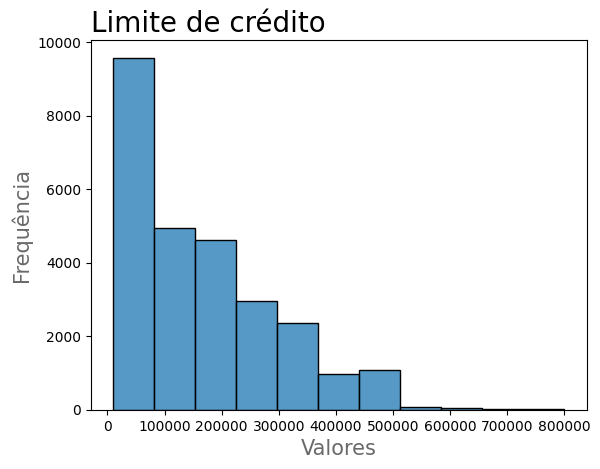

In [24]:
sns.histplot(df_clean_2['LIMIT_BAL'], bins=11)
plt.title('Limite de crédito', fontsize=20, loc='left') 
plt.xlabel('Valores', fontsize=15, color='#696969') 
plt.ylabel('Frequência', fontsize=15, color='#696969')

Text(0, 0.5, 'Frequência')

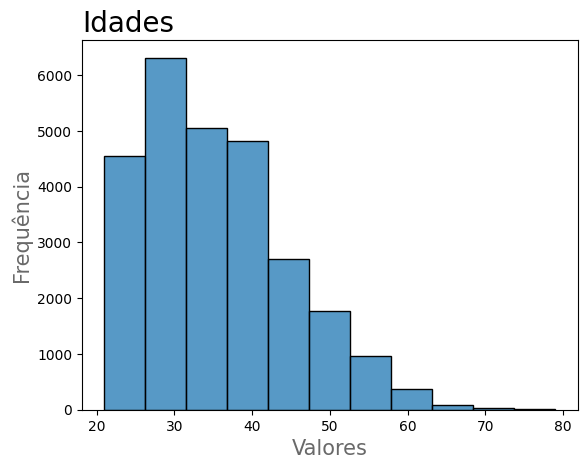

In [25]:
sns.histplot(df_clean_2['AGE'], bins=11)
plt.title('Idades', fontsize=20, loc='left') 
plt.xlabel('Valores', fontsize=15, color='#696969') 
plt.ylabel('Frequência', fontsize=15, color='#696969')

In [26]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Na parte de educação, os valores 0,5 e 6 devem ficar no valor 4, que corresponde por "outros"

In [27]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [28]:
df_clean_2.replace({'EDUCATION': {0: 4, 5: 4, 6: 4}}, inplace=True) #juntando os valores que estavam fora do dicionario de dados.
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

O valor 0 não esta np dicionario de dados e deve ser realocado para o valor 3 "outros"

In [29]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [30]:
df_clean_2.replace({'MARRIAGE': {0: 3}}, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

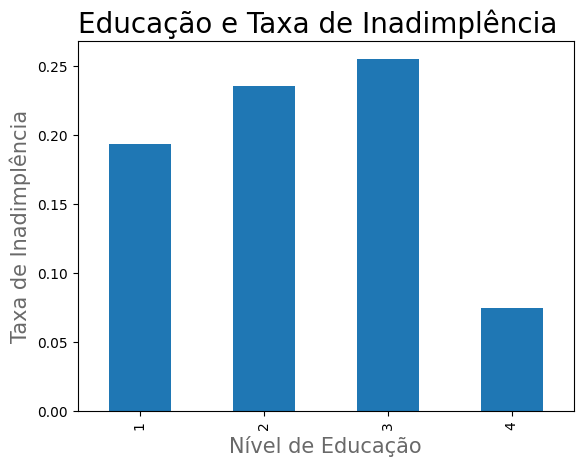

In [31]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)

plt.title('Educação e Taxa de Inadimplência', fontsize=20, loc='left')
plt.xlabel('Nível de Educação', fontsize=15, color='#696969')
plt.ylabel('Taxa de Inadimplência', fontsize=15, color='#696969')

plt.show()

7.Implementação da OHE para uma caracteristica categorica

In [32]:
df_clean_2['EDUCATION_CAT'] = 'none'        #OHE
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head()

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none


Criando o dicionario para o mapeamento das categorias de instrução de Educação

In [33]:
cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

Novo dataframe com um número igual de colunas e níveis da variável categórica

In [34]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [35]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


Comparando os dois datasets se eles conferem com os valores

In [36]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


cópia do arquivo para garantir que tenha um beckup caso ocorra algum erro no futuro

In [37]:
df_with_ohe.to_csv('Chapter_1_cleaned_data.csv', index=False)

Explorando as caracteristicas do status de pagamento do dataset

In [38]:
df = pd.read_csv('C:\\Users\\pedro\\OneDrive\\Ambiente de Trabalho\\Livro\\Chapter_1_cleaned_data.csv')

Juntar os históricos financeiros para serem melhores analisados

In [39]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [40]:
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

In [41]:
pay_1_bins = np.array(range(-2, 10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

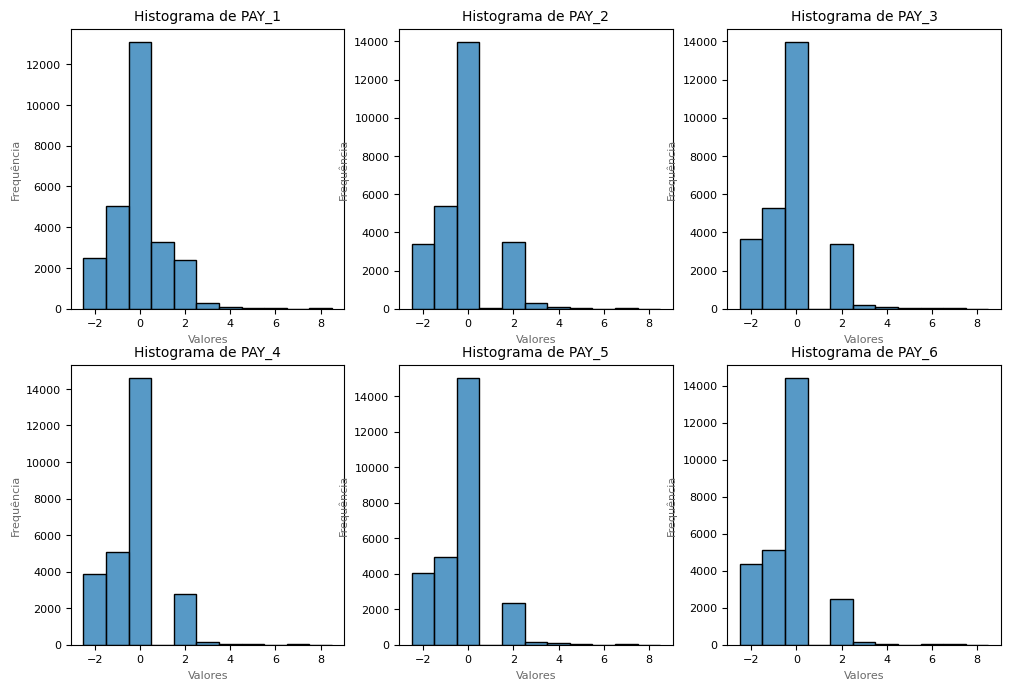

In [42]:
plt.rcParams['font.size'] = 8
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(pay_feats):
    sns.histplot(df[col], bins=pay_1_bins, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {col}', fontsize=10)
    axes[i//3, i%3].set_xlabel('Valores', fontsize=8, color='#696969')
    axes[i//3, i%3].set_ylabel('Frequência', fontsize=8, color='#696969')

plt.show()


In [43]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Explorando o restante dos dados presentes no dataset

In [44]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [45]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


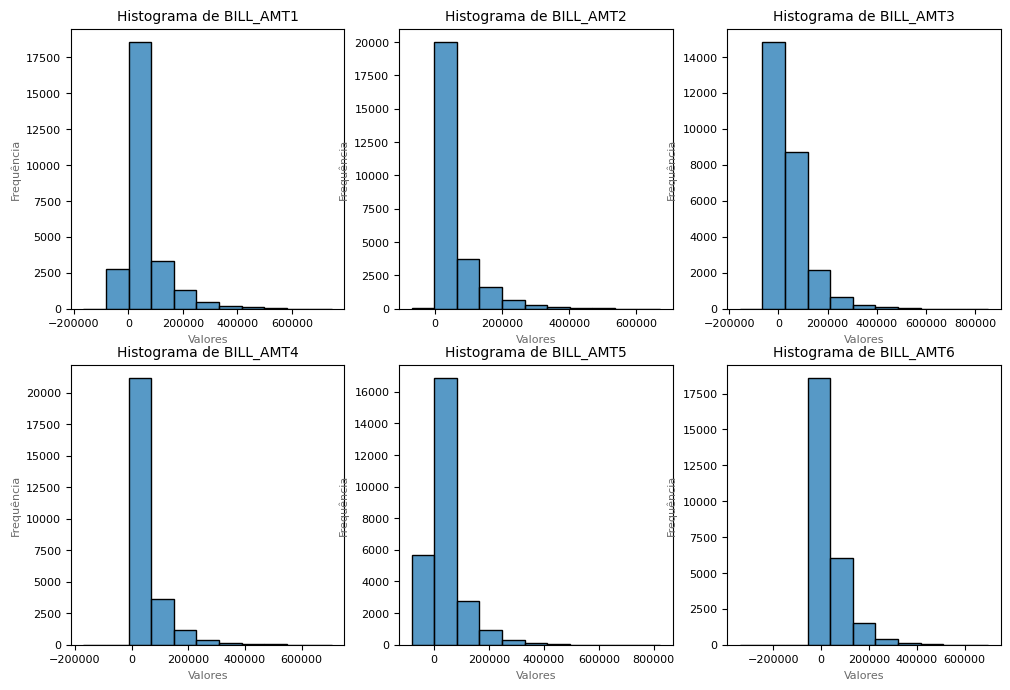

In [46]:
plt.rcParams['font.size'] = 8
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(bill_feats):
    sns.histplot(df[col], bins=11, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {col}', fontsize=10)
    axes[i//3, i%3].set_xlabel('Valores', fontsize=8, color='#696969')
    axes[i//3, i%3].set_ylabel('Frequência', fontsize=8, color='#696969')

plt.show()

In [47]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


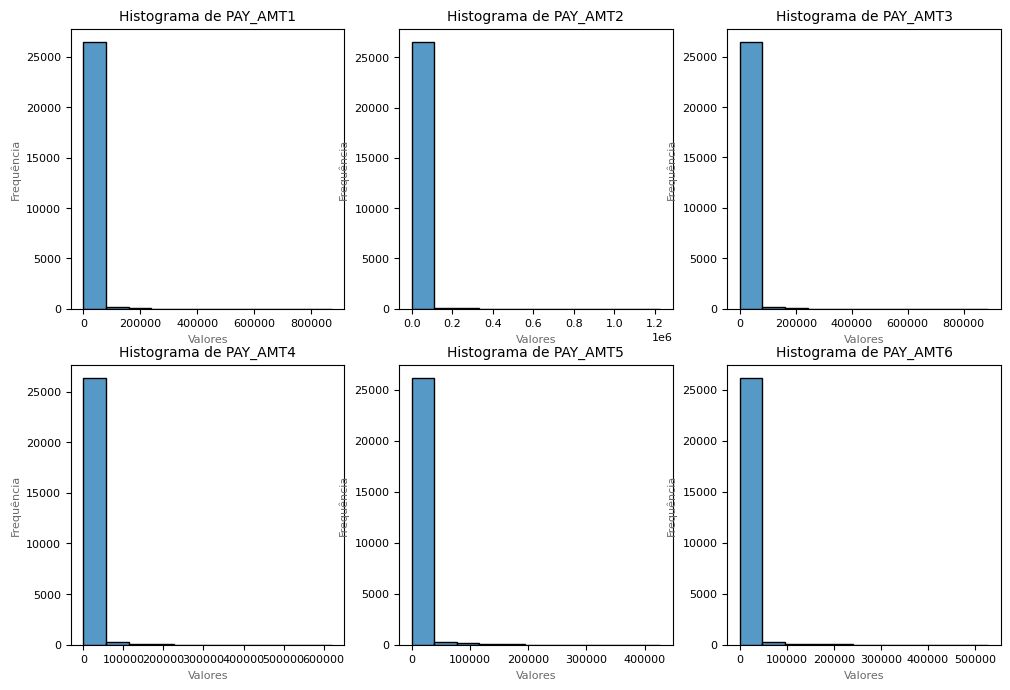

In [48]:
plt.rcParams['font.size'] = 8
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(pay_amt_feats):
    sns.histplot(df[col], bins=11, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {col}', fontsize=10)
    axes[i//3, i%3].set_xlabel('Valores', fontsize=8, color='#696969')
    axes[i//3, i%3].set_ylabel('Frequência', fontsize=8, color='#696969')

plt.show()

Mascara booleana para ver quantos dos dados são iguais a zero

In [49]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [50]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

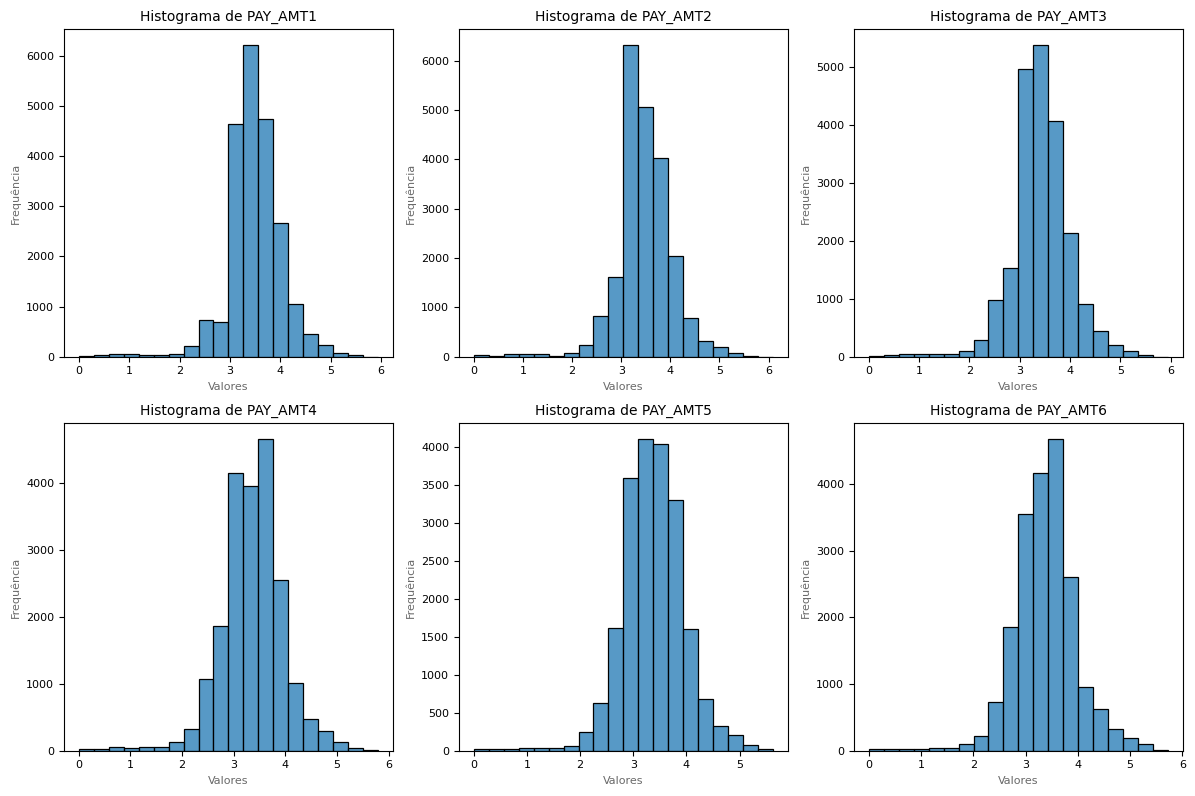

In [51]:
plt.rcParams['font.size'] = 8
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(pay_amt_feats):
    sns.histplot(df[pay_amt_feats][~pay_zero_mask][col].apply(np.log10), bins=20, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {col}', fontsize=10)
    axes[i//3, i%3].set_xlabel('Valores', fontsize=8, color='#696969')
    axes[i//3, i%3].set_ylabel('Frequência', fontsize=8, color='#696969')

plt.tight_layout()
plt.show()


## Conclusão

Em agosto acontece um aumento milhares de contas com atraso de 2 meses de pagamento, não fazendo muito sentido, porém de acordo com a proposta do projeto, o cliente teve problemas em obter dados do último mês, o que gerou dados incorretos para contas que tem atraso de 1 mês no pagamento, sendo que foi resolvido parcialemnte esse problema em setembro.


Em toda a análise realizada, foi possível descobrir que poderiamos ter prejudicado o projeto com os dados recebidos, pois eles não eram consistentes internamente. A maioria dos meses das características de status de pagamento estava com um problema no relatório de dados, incluindo valores absurdos nos dados da instituição.